In [32]:
import numpy as np
import asset_calculations
import bond_calculations
import yfinance as yf
import matplotlib.pyplot as plt

In [65]:
def asset_drawdown(asset, start_time: str, end_time: str=None, plot: bool=False):
    data = yf.download(asset, start=start_time, end=end_time)["Adj Close"]
    window = 252
    
    rolling_max = data.rolling(window, min_periods=1).max()
    daily_drawdown = data / rolling_max - 1
    max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()
    
    if plot:
        fig, ax = plt.subplots(2, 1, figsize=(18, 6), sharex=False)

        ax[0].plot(daily_drawdown * 100, label="Daily Drawdown")
        ax[0].plot(max_daily_drawdown * 100, label="Max Daily Drawdown")
        ax[0].set_ylabel("% Change")
        ax[0].legend()

        ax[1].plot(data, label="Stock Price")
        ax[1].set_ylabel("Stock Price ($)")
        ax[1].legend()
    else:
        return daily_drawdown, max_daily_drawdown
    
    

[*********************100%***********************]  1 of 1 completed


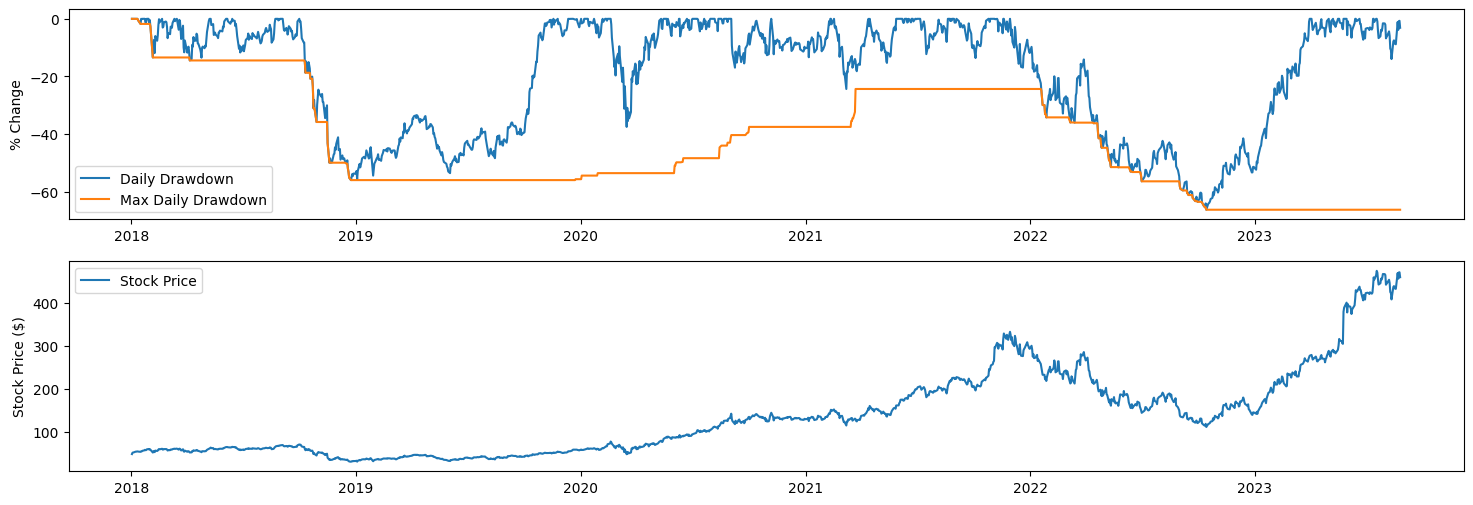

In [66]:
asset_drawdown("NVDA", start_time="2018-01-01", plot=True)